In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [2]:
trials=100_00_00       #total simulated events
low=-1;high=1;interval=high-low
test=interval*np.random.rand(trials,3)+low
#test
x=test[:,0]
y=test[:,1]
z=test[:,2]

In [3]:
x

array([-0.31226507,  0.90586276, -0.47554671, ...,  0.34899026,
       -0.45087784,  0.88809879])

In [4]:
y

array([-0.81488539, -0.09785891,  0.3742221 , ...,  0.01225677,
       -0.04082831,  0.8830086 ])

In [5]:
z

array([ 0.67183746, -0.38757239,  0.80941304, ..., -0.44601066,
        0.50800683,  0.54915761])

In [6]:

r=np.sqrt(x**2+y**2+z**2)
r

array([1.10132341, 0.99013942, 1.01061186, ..., 0.56645383, 0.68046214,
       1.3674786 ])

In [7]:
test=np.column_stack((test,r))

In [8]:
df=pd.DataFrame(test,columns=['x','y','z','r']) #data frame with x,y,z and r
df.head()

,x,y,z,r
0,-0.312265,-0.814885,0.671837,1.101323
1,0.905863,-0.097859,-0.387572,0.990139
2,-0.475547,0.374222,0.809413,1.010612
3,0.332626,-0.012070,0.231868,0.405646
4,0.591242,-0.114055,-0.516105,0.793057


In [9]:
df_less=df[df.r<0.5]          #data frame with r<0.5 (radius of the bead)
df_less.head()
total_counts=df_less.shape[0]
total_counts

65381

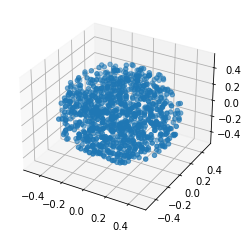

In [10]:
%matplotlib inline
df_sample=df_less.head(1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_sample.x,df_sample.y,df_sample.z)

In [11]:
#this function give the normal distance from a point to the surface of the sphere

def get_upward_distance(x,y,z,dz=0.001,r=0.5):
    '''
    returns normal distance from a point in the sphere to the surface as well as the z co-ordinate in the sphere
    '''
    #z=np.abs(z)
    d=np.sqrt(x**2+y**2+z**2)
    if z==-0.5: return 1.0,0.5
    z_up=0
    #print(f"before while z_up: {z_up}")
    while(d<r):
        z+=dz
        #print(f"Inside while z: {z}")
        z_up+=dz
        d=np.sqrt(x**2+y**2+z**2)
    #print(f"after while z_up: {z_up}")
    return z_up,z
        
    

In [12]:
#distance travelled in the bead

df_less['z_new']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[1],axis=1)
df_less['d_bead']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[0],axis=1)
df_less.head()

/tmp/ipykernel_7212/2709360843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less['z_new']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[1],axis=1)
/tmp/ipykernel_7212/2709360843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less['d_bead']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[0],axis=1)


,x,y,z,r,z_new,d_bead
2,0.140122,-0.028958,-0.096449,0.172554,0.479551,0.576
27,0.218226,-0.066513,-0.018057,0.228851,0.444943,0.463
40,-0.065847,0.021285,-0.389372,0.395474,0.495628,0.885
62,0.077561,0.058070,0.243393,0.261970,0.491393,0.248
73,-0.412954,-0.154839,0.225827,0.495484,0.235827,0.010


In [13]:
#distance travelled in the button
button_thickness=3.0
df_less['d_button']=button_thickness/2.-df_less['z_new'] #Thickness of button is 3 mm and thickness above 0 is 1.5 mm
df_less.head()

/tmp/ipykernel_7212/1364162647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less['d_button']=button_thickness/2.-df_less['z_new'] #Thickness of button is 3 mm and thickness above 0 is 1.5 mm


,x,y,z,r,z_new,d_bead,d_button
2,0.140122,-0.028958,-0.096449,0.172554,0.479551,0.576,1.020449
27,0.218226,-0.066513,-0.018057,0.228851,0.444943,0.463,1.055057
40,-0.065847,0.021285,-0.389372,0.395474,0.495628,0.885,1.004372
62,0.077561,0.058070,0.243393,0.261970,0.491393,0.248,1.008607
73,-0.412954,-0.154839,0.225827,0.495484,0.235827,0.010,1.264173


In [14]:
#changing mm to cm
mm_to_cm=0.1
df_less=df_less*mm_to_cm
df_less.head()

,x,y,z,r,z_new,d_bead,d_button
2,0.014012,-0.002896,-0.009645,0.017255,0.047955,0.0576,0.102045
27,0.021823,-0.006651,-0.001806,0.022885,0.044494,0.0463,0.105506
40,-0.006585,0.002129,-0.038937,0.039547,0.049563,0.0885,0.100437
62,0.007756,0.005807,0.024339,0.026197,0.049139,0.0248,0.100861
73,-0.041295,-0.015484,0.022583,0.049548,0.023583,0.0010,0.126417


$ P_{transmission} = e^{-\frac{x}{\lambda}} $ <br>

x is thickness and $\lambda$ is attenuation length
<br> $\lambda = \frac{1}{\rho \cdot \mu} $ <br>
$ P_{transmission} = e^{-\mu \cdot \rho \cdot x} $ <br>

$ \mu $ ($cm^2/g$) <br> $ \rho $ ($g/cm^3$) <br> $\lambda (cm)$ <br>
$ \mu$ from https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html
<br>
Tranmission factor from: https://www.ezag.com/home/products/isotope_products/isotrak_calibration_sources/reference_sources/gamma_sources/point_sources/#c601

# fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"")
# ceramic: O7410-Na300-Ca60-Mg10-Al600-Si1600-Pb4


![image](beadcomposition.png)

In [15]:
#Probabality of scatering from the button

button_density = 1.10         #.18        #g/cm^3 (from simulation data)
#button_mu_pb   = 0.1976       #C5H8O2 for 47keV (0.047 MeV) gamma rays
bead_mu_pb     = 3.195E-01    #47 keV pb-21O for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4
bead_mu_am     = 2.314E-01    #60 keV am-241 for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4

button_mu_pb =    1.797E-01     #C870O98N32
button_mu_am =    1.669E-01     #60 keV Am-241



#trnasmission factors from manufacturer
transmission_pb=0.964   #47 keV pb-210

transmission_am=0.958   #60 keV am-241

#Am-241 0.958


#button_mu_am=0.1815    #60 keV am-241
#lambda calculation for acrylic button  (C5H802)
#fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"");
#density is from oldmc




def transmission_prob(x,mu,rho):
    '''reutrns button transmission probability'''
    #return (1-np.exp(-1.0*x*mu*rho))
    return (np.exp(-1.0*x*mu*rho))

    
    
    

In [16]:
#adding the transmississin though button
df_less['button_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_button'],button_mu_pb,button_density),axis=1)
df_less['button_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_button'],button_mu_am,button_density),axis=1)
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am
2,0.014012,-0.002896,-0.009645,0.017255,0.047955,0.0576,0.102045,0.980031,0.981440
27,0.021823,-0.006651,-0.001806,0.022885,0.044494,0.0463,0.105506,0.979361,0.980817
40,-0.006585,0.002129,-0.038937,0.039547,0.049563,0.0885,0.100437,0.980342,0.981730
62,0.007756,0.005807,0.024339,0.026197,0.049139,0.0248,0.100861,0.980260,0.981653
73,-0.041295,-0.015484,0.022583,0.049548,0.023583,0.0010,0.126417,0.975321,0.977058


In [17]:
#creating the random number bewteen 0 and 1, if the prob_product is greater than random number add 1 else add 0
def random_assign(x):
    if x>np.random.rand():
        return 1
    return 0
    

In [18]:
#adding the transmississin though button
bead_density=2.55#g/cm^3  
df_less['bead_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
df_less['bead_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am
2,0.014012,-0.002896,-0.009645,0.017255,0.047955,0.0576,0.102045,0.980031,0.981440,0.954156,0.966583
27,0.021823,-0.006651,-0.001806,0.022885,0.044494,0.0463,0.105506,0.979361,0.980817,0.962981,0.973050
40,-0.006585,0.002129,-0.038937,0.039547,0.049563,0.0885,0.100437,0.980342,0.981730,0.930435,0.949119
62,0.007756,0.005807,0.024339,0.026197,0.049139,0.0248,0.100861,0.980260,0.981653,0.979998,0.985473
73,-0.041295,-0.015484,0.022583,0.049548,0.023583,0.0010,0.126417,0.975321,0.977058,0.999186,0.999410


In [19]:
N_generated=df_less.shape[0]
#df_less['N_emitted']=df_less['button_transmission_prob']*df_less['bead_transmission_prob']*N_generated
df_less['prob_product_pb']=df_less['button_transmission_prob_pb']*df_less['bead_transmission_prob_pb']
df_less['prob_product_am']=df_less['button_transmission_prob_am']*df_less['bead_transmission_prob_am']
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am,prob_product_pb,prob_product_am
2,0.014012,-0.002896,-0.009645,0.017255,0.047955,0.0576,0.102045,0.980031,0.981440,0.954156,0.966583,0.935102,0.948643
27,0.021823,-0.006651,-0.001806,0.022885,0.044494,0.0463,0.105506,0.979361,0.980817,0.962981,0.973050,0.943106,0.954383
40,-0.006585,0.002129,-0.038937,0.039547,0.049563,0.0885,0.100437,0.980342,0.981730,0.930435,0.949119,0.912145,0.931778
62,0.007756,0.005807,0.024339,0.026197,0.049139,0.0248,0.100861,0.980260,0.981653,0.979998,0.985473,0.960653,0.967393
73,-0.041295,-0.015484,0.022583,0.049548,0.023583,0.0010,0.126417,0.975321,0.977058,0.999186,0.999410,0.974526,0.976482


In [20]:
#avg_of_prob_pb=round(df_less['prob_product_pb'].mean(),3)
avg_of_prob_am=round(df_less['prob_product_am'].mean(),3)
avg_of_prob_am

0.958

In [21]:
avg_random=round(df_less['prob_product_am'].apply(lambda x:random_assign(x)).mean(),3)
avg_random

0.957

# IGNORE BELOW THIS

In [27]:
def get_prob_am(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for am-241
    '''
    df_less['bead_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
    df_less['prob_product_am']=df_less['button_transmission_prob_am']*df_less['bead_transmission_prob_am']
    avg_prob_am=round(df_less['prob_product_am'].mean(),3)
    return [bead_density,avg_prob_am]
def get_prob_pb(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for pb-210
    '''
    df_less['bead_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
    df_less['prob_product_pb']=df_less['button_transmission_prob_pb']*df_less['bead_transmission_prob_pb']
    avg_prob_am=round(df_less['prob_product_pb'].mean(),3)
    return [bead_density,avg_prob_am]

In [28]:
density_prob=[]
for i in np.arange(0,4,0.05):
    test=get_prob_am(i)
    density_prob.append(test)
    print(f"test :{test}")
#df_less.head()
    

test :[0.0, 0.98]
test :[0.05, 0.979]
test :[0.1, 0.979]
test :[0.15000000000000002, 0.978]
test :[0.2, 0.978]
test :[0.25, 0.977]
test :[0.30000000000000004, 0.977]
test :[0.35000000000000003, 0.977]
test :[0.4, 0.976]
test :[0.45, 0.976]
test :[0.5, 0.975]
test :[0.55, 0.975]
test :[0.6000000000000001, 0.974]
test :[0.65, 0.974]
test :[0.7000000000000001, 0.974]
test :[0.75, 0.973]
test :[0.8, 0.973]
test :[0.8500000000000001, 0.972]
test :[0.9, 0.972]
test :[0.9500000000000001, 0.972]
test :[1.0, 0.971]
test :[1.05, 0.971]
test :[1.1, 0.97]
test :[1.1500000000000001, 0.97]
test :[1.2000000000000002, 0.969]
test :[1.25, 0.969]
test :[1.3, 0.969]
test :[1.35, 0.968]
test :[1.4000000000000001, 0.968]
test :[1.4500000000000002, 0.967]
test :[1.5, 0.967]
test :[1.55, 0.966]
test :[1.6, 0.966]
test :[1.6500000000000001, 0.966]
test :[1.7000000000000002, 0.965]
test :[1.75, 0.965]
test :[1.8, 0.964]
test :[1.85, 0.964]
test :[1.9000000000000001, 0.964]
test :[1.9500000000000002, 0.963]
tes

In [29]:
density_prob=[]
for i in np.arange(0,4,0.05):
    test=get_prob_pb(i)
    density_prob.append(test)
    print(f"test :{test}")
#df_less.head()
    

test :[0.0, 0.978]
test :[0.05, 0.977]
test :[0.1, 0.977]
test :[0.15000000000000002, 0.976]
test :[0.2, 0.976]
test :[0.25, 0.975]
test :[0.30000000000000004, 0.974]
test :[0.35000000000000003, 0.974]
test :[0.4, 0.973]
test :[0.45, 0.973]
test :[0.5, 0.972]
test :[0.55, 0.972]
test :[0.6000000000000001, 0.971]
test :[0.65, 0.97]
test :[0.7000000000000001, 0.97]
test :[0.75, 0.969]
test :[0.8, 0.969]
test :[0.8500000000000001, 0.968]
test :[0.9, 0.968]
test :[0.9500000000000001, 0.967]
test :[1.0, 0.966]
test :[1.05, 0.966]
test :[1.1, 0.965]
test :[1.1500000000000001, 0.965]
test :[1.2000000000000002, 0.964]
test :[1.25, 0.963]
test :[1.3, 0.963]
test :[1.35, 0.962]
test :[1.4000000000000001, 0.962]
test :[1.4500000000000002, 0.961]
test :[1.5, 0.961]
test :[1.55, 0.96]
test :[1.6, 0.959]
test :[1.6500000000000001, 0.959]
test :[1.7000000000000002, 0.958]
test :[1.75, 0.958]
test :[1.8, 0.957]
test :[1.85, 0.957]
test :[1.9000000000000001, 0.956]
test :[1.9500000000000002, 0.955]
tes

In [ ]:
for i in np.linspace(0,1,0.1):
    test=get_prob(i)
    print(f"test :{test}")

In [ ]:
get_prob(0.3)

In [ ]:
avg_prob=round(df_less['prob_product'].mean(),3)
avg_prob

In [ ]:
prob=get_prob(0.1)

In [ ]:
prob

In [ ]:
for i in range(0.1,10.0,0.1):
    prob=get_prob(i)
    print(f"prob: {prob}")